# Imports

In [ ]:
import gzip
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score
import pickle

# Reading in the data

In [ ]:
def reading_in(path):
    thing=[]
    for line in gzip.open(path):
        review_data = json.loads(line)
        subthing = dict()
        for key in review_data:
            subthing[key]= review_data[key]
        thing.append(subthing)
    return thing


In [ ]:
train = reading_in('../data/classification/music_reviews_train.json.gz')
dev = reading_in('../data/classification/music_reviews_dev.json.gz')
#test = reading_in('../data/classification/music_reviews_test_masked.json.gz')
#difficult = reading_in('../data/difficult cases/phase2_testData-masked.json.gz')

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [ ]:
len([i for i in test if "reviewText" in i.keys()])#how many do have review

9993

In [ ]:
#checking sentiments
sents=set()
[sents.add(i['sentiment']) for i in train if "reviewText" in i.keys()];
print(sents)

{'positive', 'negative'}


In [ ]:
train_x = [i['reviewText'] if "reviewText" in i.keys() else "" for i in train]
train_y =  [i['sentiment'] for i in train]

dev_x = [i['reviewText'] if "reviewText" in i.keys() else "" for i in dev]
dev_y = [i['sentiment'] for i in dev]

#test_x = [i['reviewText'] if "reviewText" in i.keys() else "" for i in test]
#test_y = [i['sentiment'] for i in test]

#diff_test_x = [i['reviewText'] if "reviewText" in i.keys() else "" for i in test]
#diff_test_y = [i['sentiment'] for i in test] #empty

In [ ]:
len([i for i in train_y if i=="negative"])/1000 #percentage negative

39.217

In [ ]:
test

[{'verified': True,
  'reviewTime': '10 24, 2017',
  'reviewerID': 'A2HAJB8L9NVYTZ',
  'asin': 'B007Y1AMHE',
  'reviewText': 'ok',
  'summary': 'ok',
  'unixReviewTime': 1508803200,
  'sentiment': '_',
  'id': 0},
 {'verified': True,
  'reviewTime': '04 8, 2015',
  'reviewerID': 'AD78RH9JWBDEU',
  'asin': 'B007Y1AMHE',
  'reviewText': 'Its awesome',
  'summary': 'love it',
  'unixReviewTime': 1428451200,
  'sentiment': '_',
  'id': 1},
 {'verified': True,
  'reviewTime': '03 3, 2015',
  'reviewerID': 'A5UNQFT0JQ8B',
  'asin': 'B007Y1AMHE',
  'reviewText': 'great, really good!',
  'summary': 'Five Stars',
  'unixReviewTime': 1425340800,
  'sentiment': '_',
  'id': 2},
 {'verified': True,
  'reviewTime': '05 31, 2014',
  'reviewerID': 'A1NPTQTAYO51XW',
  'asin': 'B007Y1AMHE',
  'reviewText': 'THANK THEE LORD FOR THIS YOUNG MAN WISDOM, I PRAY THAT THEE YOUNGER GENERATION WILL UNDERSTAND & LIVE AS HE!!!',
  'summary': 'LISTEN & FOLLOW!!!',
  'unixReviewTime': 1401494400,
  'sentiment': '_'

In [ ]:
len(train_x)#fixed len by adding empty strings

100000

In [ ]:
#Label encoding

#def sent_encoder(y_values):
#    le = preprocessing.LabelEncoder()
#    le.fit(['negative', 'positive'])
#    train_y = le.transform(y_values)
#    return train_y

In [ ]:
#train_y = sent_encoder(train_y)
#dev_y = sent_encoder(dev_y)

In [ ]:
train_y

['positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',

In [ ]:
#vocab_dict = count_vect.vocabulary_
#vocab_list = count_vect.get_feature_names()

#X_array = X_train_counts.toarray()
#X_array.sum()

### grid search over:
* n in ngrams 
* 

# Pipeline

In [ ]:
pipeline = Pipeline([
    ('CountVectorizer',CountVectorizer(ngram_range=(1, 2))),
    ('Tfidf',TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1, fit_prior=False))
])#best params given here

In [ ]:
pipeline.fit(train_x, train_y)

Pipeline(steps=[('CountVectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('Tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1, fit_prior=False))])

In [ ]:
pred_train = pipeline.predict(train_x)
f1 = f1_score(train_y, pred_train, average='macro')
print('Macro-F1 score for train is:', f1)
pred = pipeline.predict(dev_x)
f1 = f1_score(dev_y, pred, average='macro')
print('Macro-F1 score for development is:', f1)

Macro-F1 score for train is: 0.9541741900457255
Macro-F1 score for development is: 0.9169062476757955


In [ ]:
#difficult cases
diff_pred_train = pipeline.predict(diff_test_x)


##### making test_pred_Y file to be uploaded

In [ ]:
pred_test = pipeline.predict(test_x)

In [ ]:
#create a list of json objects 
def reading_in2(path):
    thing = []
    for line in gzip.open(path):
        review_data = json.loads(line)
        thing.append(review_data)
    return thing

In [ ]:
test2 = reading_in2('../data/classification/music_reviews_test_masked.json.gz')

In [ ]:
for x,i in enumerate(test2):
    i["sentiment"]=pred_test[x] 
#test2

In [ ]:
test_json=[json.dumps(i)+"\n" for i in test2]# as lists of json objects with newline
test_json

['{"verified": true, "reviewTime": "10 24, 2017", "reviewerID": "A2HAJB8L9NVYTZ", "asin": "B007Y1AMHE", "reviewText": "ok", "summary": "ok", "unixReviewTime": 1508803200, "sentiment": "negative", "id": 0}\n',
 '{"verified": true, "reviewTime": "04 8, 2015", "reviewerID": "AD78RH9JWBDEU", "asin": "B007Y1AMHE", "reviewText": "Its awesome", "summary": "love it", "unixReviewTime": 1428451200, "sentiment": "positive", "id": 1}\n',
 '{"verified": true, "reviewTime": "03 3, 2015", "reviewerID": "A5UNQFT0JQ8B", "asin": "B007Y1AMHE", "reviewText": "great, really good!", "summary": "Five Stars", "unixReviewTime": 1425340800, "sentiment": "positive", "id": 2}\n',
 '{"verified": true, "reviewTime": "05 31, 2014", "reviewerID": "A1NPTQTAYO51XW", "asin": "B007Y1AMHE", "reviewText": "THANK THEE LORD FOR THIS YOUNG MAN WISDOM, I PRAY THAT THEE YOUNGER GENERATION WILL UNDERSTAND & LIVE AS HE!!!", "summary": "LISTEN & FOLLOW!!!", "unixReviewTime": 1401494400, "sentiment": "positive", "id": 3}\n',
 '{"ve

In [ ]:
with open ("../data/music_reviews_test.json","w") as file:
    file.writelines(test_json)

In [ ]:
##into json for difficult
diff_pred_train

array(['negative', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [ ]:
diff_test2 = reading_in2('../data/difficult cases/phase2_testData-masked.json.gz')
type(diff_test2[0])

dict

In [ ]:
for x,i in enumerate(diff_test2):
    i["sentiment"]=diff_pred_train[x]
    print(i) 
#test2
diff_test2

{'reviewText': 'eBautiful! Beautiufl', 'sentiment': 'negative', 'category': "{'typos', 'punct', 'negation'}", 'group': '12'}
{'reviewText': 'wonderflu. It is usblime, peaceful, wonderful', 'sentiment': 'positive', 'category': "{'typos', 'punct', 'negation'}", 'group': '12'}
{'reviewText': 'Five Stars Dumbfounded by Gid and His hanidwork', 'sentiment': 'positive', 'category': "{'typos', 'punct', 'negation'}", 'group': '12'}
{'reviewText': 'oHax. oHax. You tuber recreatde, sounds like music. http://youtu.eb/qnMmYejDIZ0 .', 'sentiment': 'positive', 'category': "{'typos', 'punct', 'negation'}", 'group': '12'}
{'reviewText': 'On eStar I had hope for a lot better. Would ont recommend', 'sentiment': 'positive', 'category': "{'typos', 'punct', 'negation'}", 'group': '12'}
{'reviewText': 'Listening toi t thru soundcloud is longer. Too short of a muisc for how much we paid for it. :(\nWe were disappointed, why did they a tleast loop the music or something', 'sentiment': 'negative', 'category': "

[{'reviewText': "It's the shit",
  'sentiment': 'negative',
  'category': 'slang',
  'group': '1'},
 {'reviewText': "It's so shit",
  'sentiment': 'positive',
  'category': 'slang',
  'group': '1'},
 {'reviewText': 'My ears are bleeding',
  'sentiment': 'positive',
  'category': 'exaggeration',
  'group': '1'},
 {'reviewText': 'My soul is singing',
  'sentiment': 'positive',
  'category': 'exaggeration',
  'group': '1'},
 {'reviewText': 'XD imagine listening to this from your free will😂👌😂👌',
  'sentiment': 'positive',
  'category': 'emoji',
  'group': '1'},
 {'reviewText': "I can't stay awake listening to this",
  'sentiment': 'negative',
  'category': 'basic',
  'group': '1'},
 {'reviewText': "I can't stay awake listening to this",
  'sentiment': 'negative',
  'category': 'basic',
  'group': '1'},
 {'reviewText': 'How could anyone hate this',
  'sentiment': 'negative',
  'category': 'basic',
  'group': '1'},
 {'reviewText': 'This song could wake up the dead 💀💀💀💯💯💯😩',
  'sentiment': 'n

In [ ]:
diff_test_json=[json.dumps(i)+"\n" for i in diff_test2]# as lists of json objects with newline
diff_test_json

['{"reviewText": "It\'s the shit", "sentiment": "negative", "category": "slang", "group": "1"}\n',
 '{"reviewText": "It\'s so shit", "sentiment": "positive", "category": "slang", "group": "1"}\n',
 '{"reviewText": "My ears are bleeding", "sentiment": "positive", "category": "exaggeration", "group": "1"}\n',
 '{"reviewText": "My soul is singing", "sentiment": "positive", "category": "exaggeration", "group": "1"}\n',
 '{"reviewText": "XD imagine listening to this from your free will\\ud83d\\ude02\\ud83d\\udc4c\\ud83d\\ude02\\ud83d\\udc4c", "sentiment": "positive", "category": "emoji", "group": "1"}\n',
 '{"reviewText": "I can\'t stay awake listening to this", "sentiment": "negative", "category": "basic", "group": "1"}\n',
 '{"reviewText": "I can\'t stay awake listening to this", "sentiment": "negative", "category": "basic", "group": "1"}\n',
 '{"reviewText": "How could anyone hate this", "sentiment": "negative", "category": "basic", "group": "1"}\n',
 '{"reviewText": "This song could wak

In [ ]:
with open ("../data/difficult cases/group6_diff","w") as file:
    file.writelines(diff_test_json)

In [ ]:
size = [500, 1000, 2500, 5000, 10000, 20000, 30000, 50000, 60000, 70000, 80000, 90000, 100000]
train_acc = []
dev_acc = []
for i in size:
    pipeline.fit(train_x[:i],train_y[:i] )
    pred_train = pipeline.predict(train_x)
    train_acc.append(f1_score(train_y, pred_train, average='macro'))
    pred = pipeline.predict(dev_x)
    dev_acc.append(f1_score(dev_y, pred, average='macro'))
    print(f'done with size {i}')


done with size 500
done with size 1000
done with size 2500
done with size 5000
done with size 10000
done with size 20000
done with size 30000
done with size 50000
done with size 60000
done with size 70000
done with size 80000
done with size 90000
done with size 100000


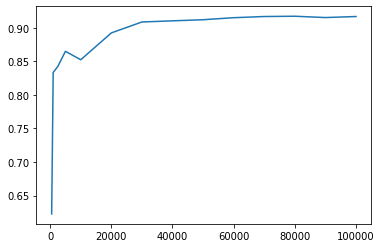

In [ ]:
import matplotlib.pyplot as plt
plt.plot(size, dev_acc)

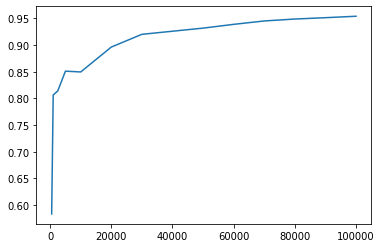

In [ ]:
plt.plot(size, train_acc)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b88dfe01-c7e1-473c-bcfd-798313fc6522' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>